In [2]:
import utils
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import AllChem, Descriptors, Draw
import random
import pickle

from rdkit import RDLogger

RDLogger.DisableLog('rdApp.*')

In [8]:
with open('/sharefs/sharefs-qb/spherenet/provided_mols.mol_dict', 'rb') as f:
    mols_gen_cluster = pickle.load(f)

mols_gen = {'atomic_nums':[], 'positions': []}
for num in mols_gen_cluster.keys():
    mols_gen['atomic_nums'].extend(mols_gen_cluster[num]['_atomic_numbers'])
    mols_gen['positions'].extend(mols_gen_cluster[num]['_positions'])

mols_gen = [utils.xyz2mol(mols_gen['atomic_nums'][i], mols_gen['positions'][i]) for i in range(len(mols_gen['atomic_nums']))]
mols_gen = [Chem.RemoveHs(clean[2]) for clean in mols_gen if clean[2]!=None]
mols_gen = [clean[2] for clean in mols_gen if clean[2]!=None]
random.shuffle(mols_gen)


In [12]:
len(mols_gen['atomic_nums'])

10000

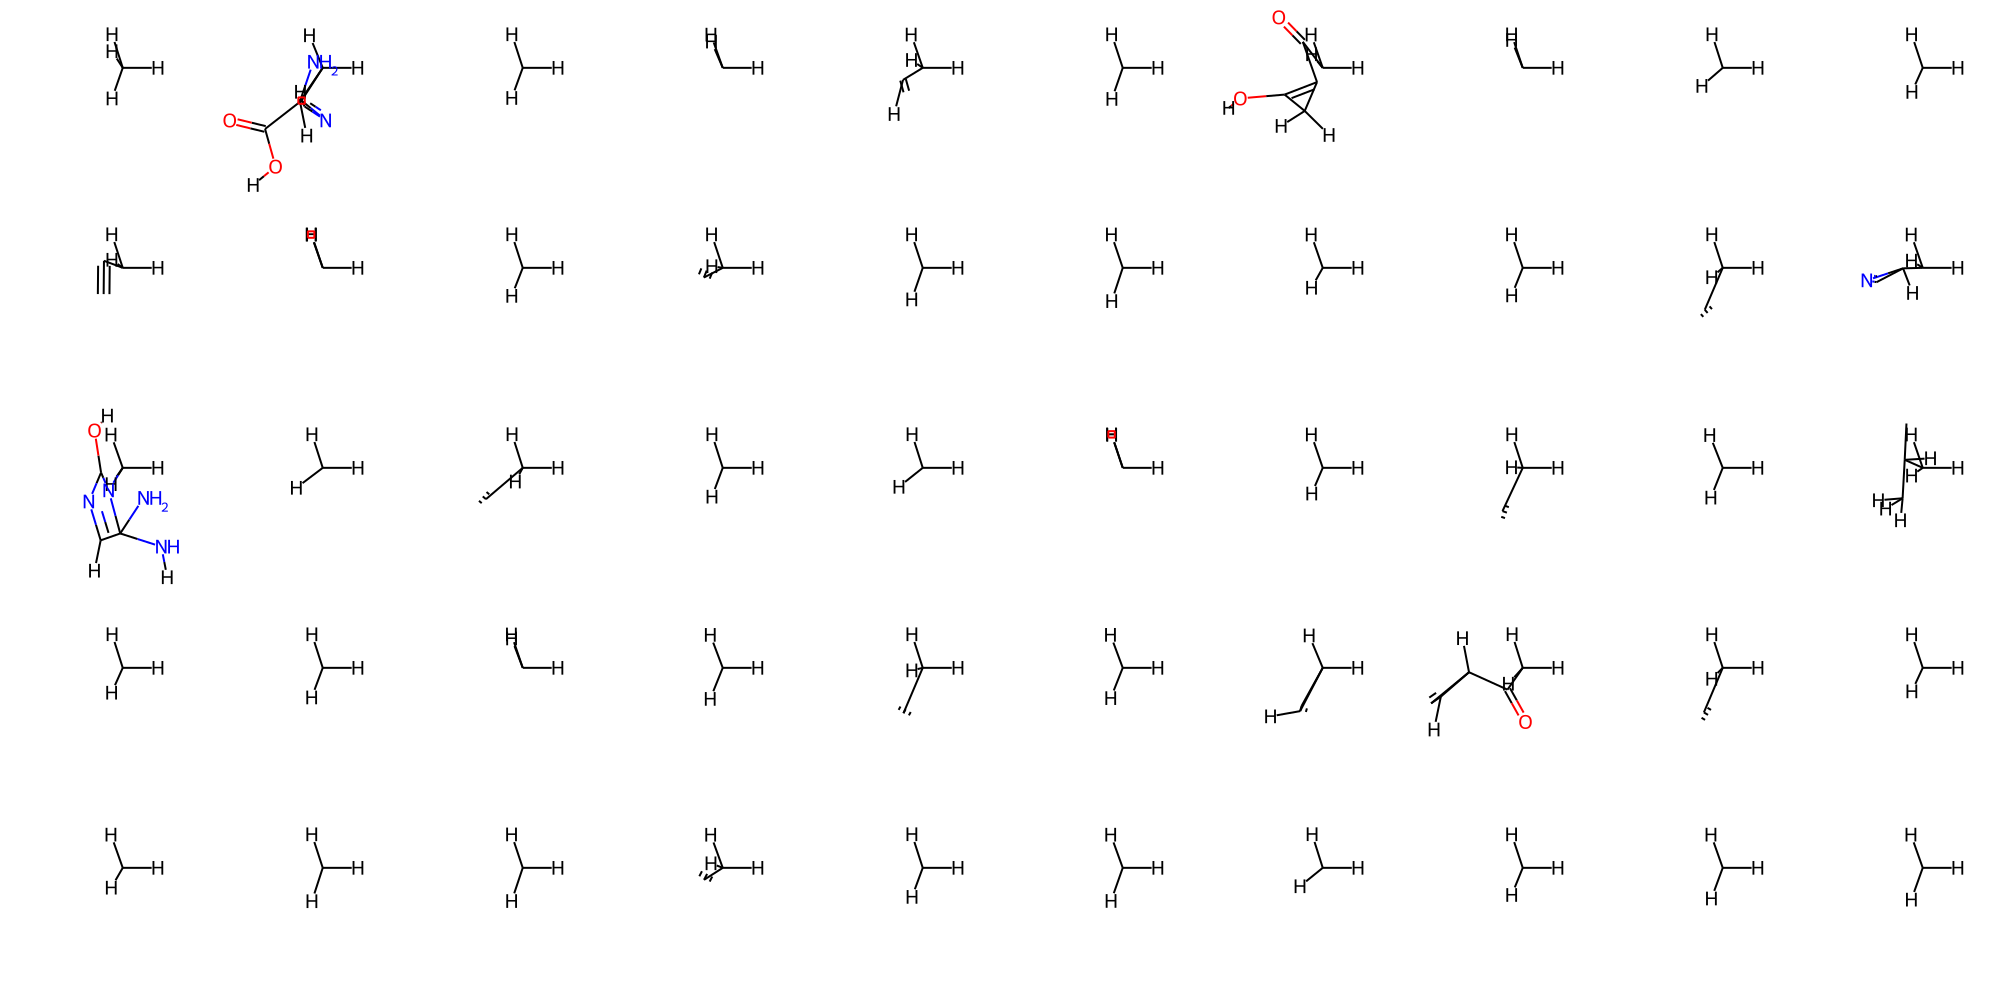

In [13]:
Draw.MolsToGridImage(mols_gen[3000:3100], molsPerRow=10)

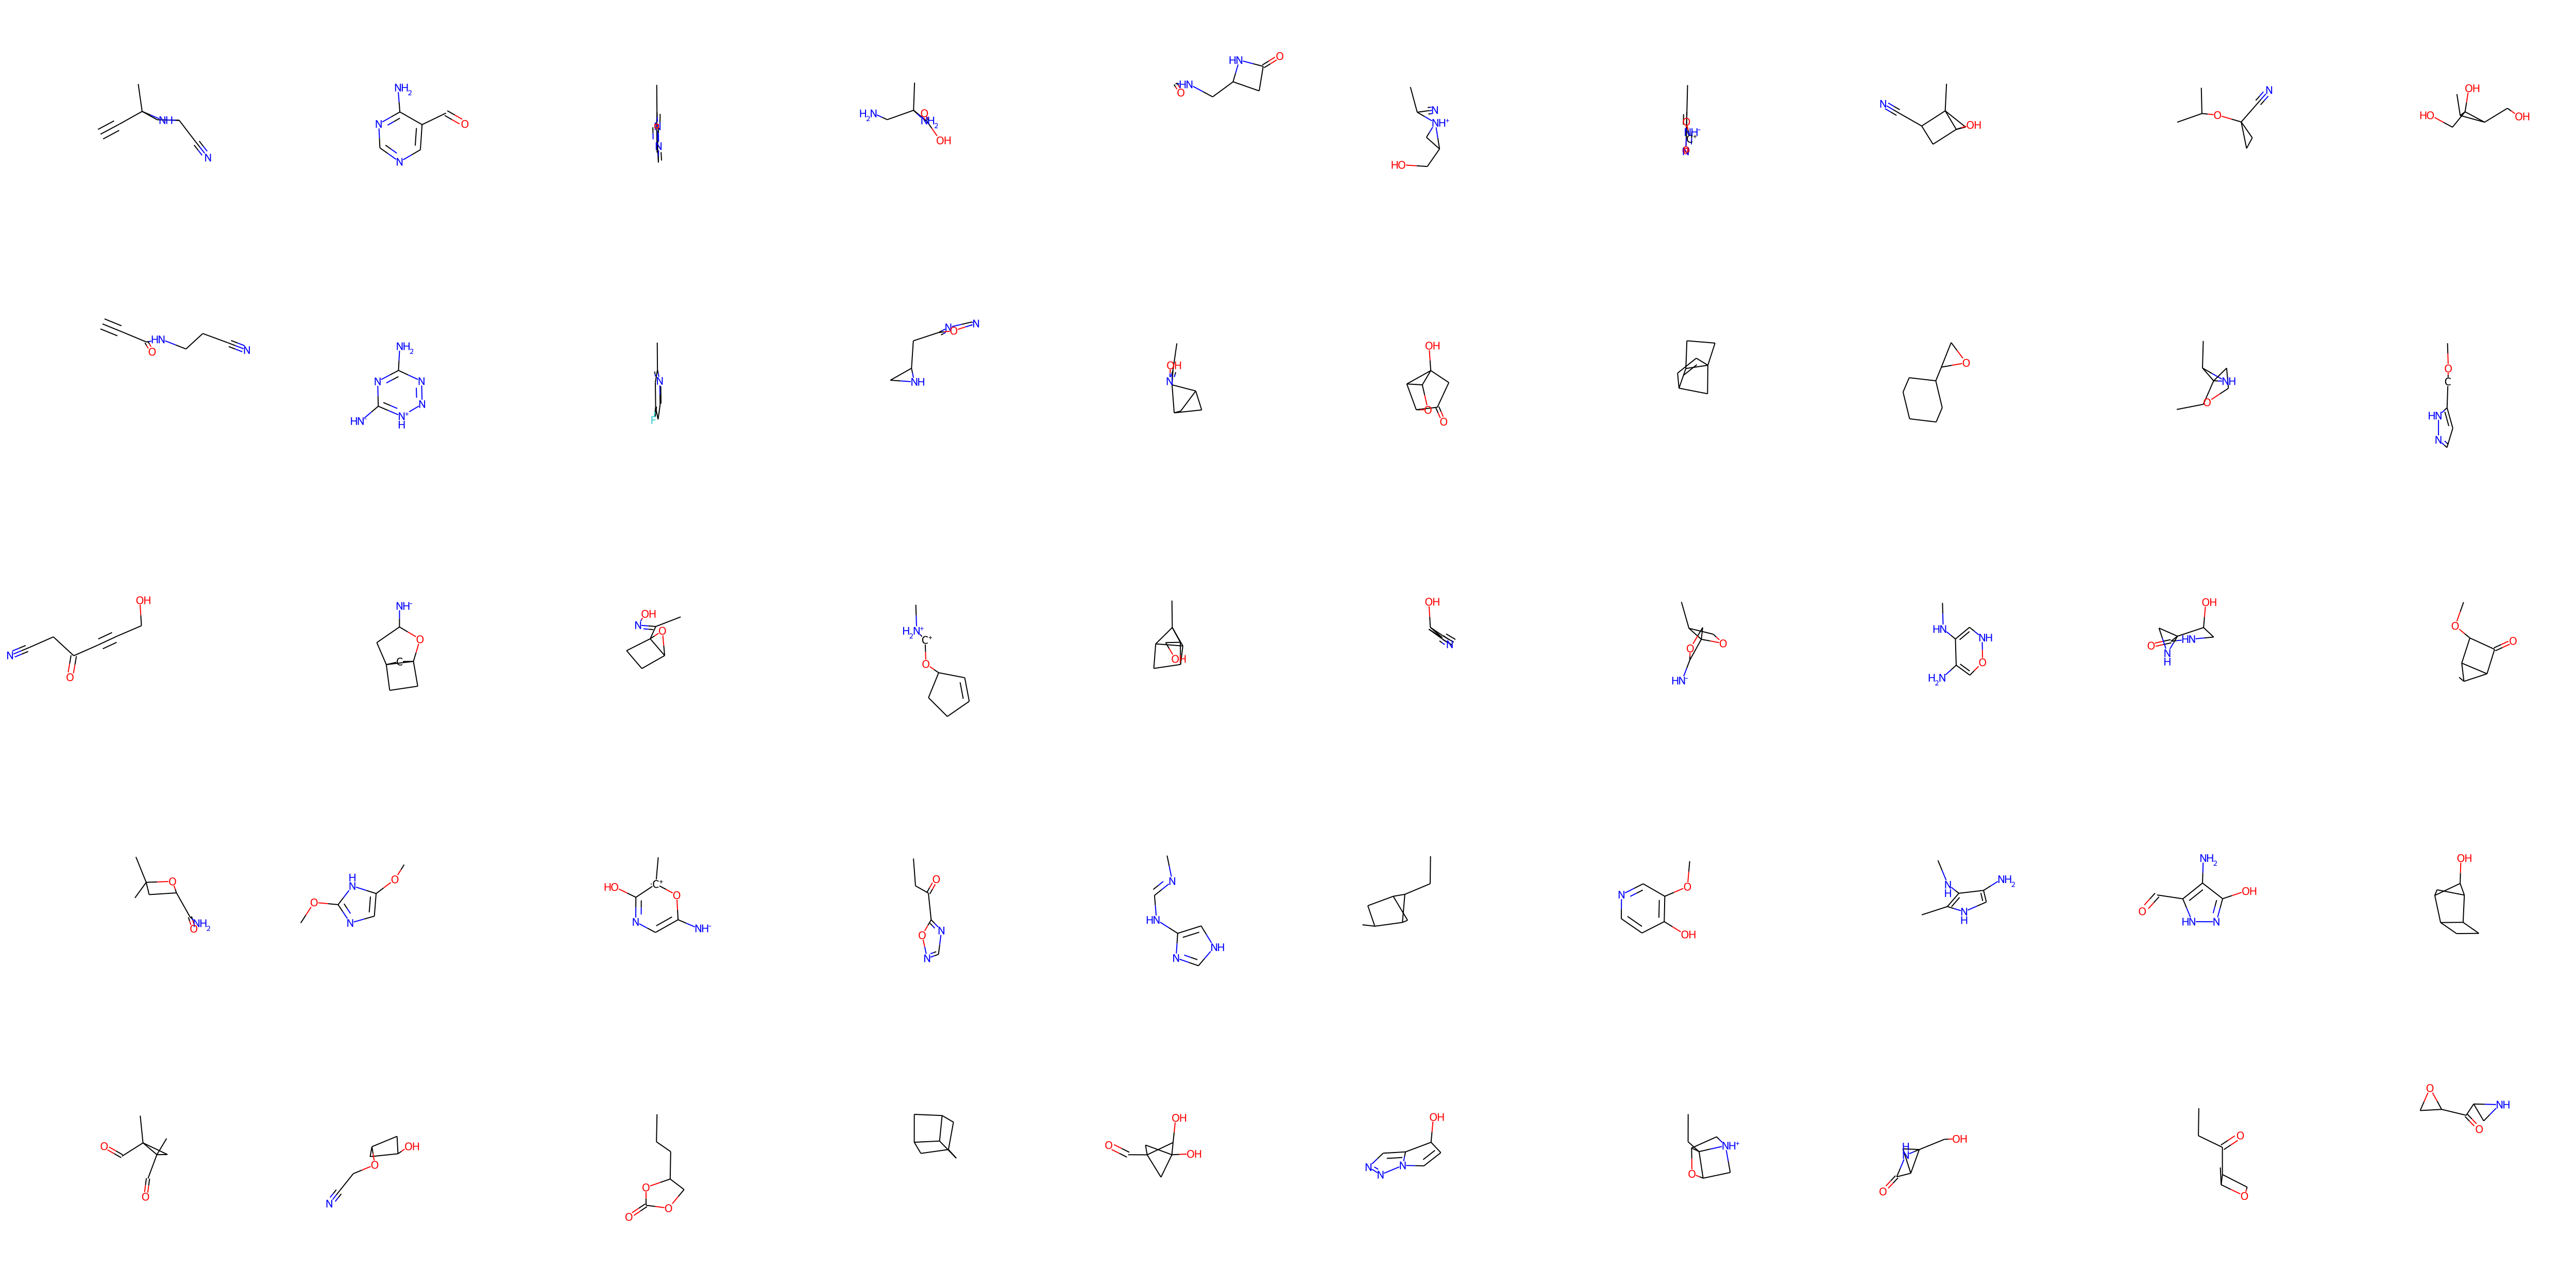

In [4]:
suppl = Chem.SDMolSupplier('/home/qiangbo/molgen/sphereNet/qm9/gdb9.sdf')
reference_mols = [mol for mol in suppl if mol]
random.shuffle(reference_mols)
Draw.MolsToGridImage(reference_mols, molsPerRow=10, subImgSize=[500 for _ in range(len(reference_mols))])

In [9]:
utils.check_validity(mols_gen_cluster)[0]

{'n_generated': 10000, 'valid_ratio': 0.7245}

In [ ]:
compute_bonds_mmd(mols_gen_cluster, valid_list, con_mat_list, target_bond_dist, file_name=None)

In [17]:
import pickle
with open('/sharefs/sharefs-qb/spherenet/valid_loss_log.pkl', 'rb') as f:
    valid_loss = pickle.load(f)
valid_loss_sum = [loss['torision_loss'] for loss in valid_loss]

In [18]:
valid_loss_sum.index(min(valid_loss_sum))

36

In [ ]:
54 41 48 36